In [20]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
from scipy.signal  import argrelextrema

In [21]:
df = pd.read_csv("Binance_BTCUSDT_d.csv")
df

,unix,date,symbol,open,high,low,close,Volume BTC,Volume USDT,tradecount
0,1.665446e+12,2022-10-11 00:00:00,BTC/USDT,19131.87,19133.52,18950.01,19032.94,9337.97001,1.777093e+08,158282.0
1,1.665360e+12,2022-10-10 00:00:00,BTC/USDT,19439.96,19525.00,19020.25,19131.87,212509.09849,4.101745e+09,4432688.0
2,1.665274e+12,2022-10-09 00:00:00,BTC/USDT,19416.52,19558.00,19316.04,19439.02,113900.82681,2.215007e+09,2833704.0
3,1.665187e+12,2022-10-08 00:00:00,BTC/USDT,19530.09,19627.38,19237.14,19417.96,102480.09842,1.995917e+09,2637385.0
4,1.665101e+12,2022-10-07 00:00:00,BTC/USDT,19960.67,20068.82,19320.00,19530.09,220874.83913,4.353681e+09,4324772.0
...,...,...,...,...,...,...,...,...,...,...
1878,1.503274e+09,2017-08-21,BTC/USDT,4086.29,4119.62,3911.79,4016.00,685.12000,2.770592e+06,NaN
1879,1.503187e+09,2017-08-20,BTC/USDT,4139.98,4211.08,4032.62,4086.29,463.54000,1.915636e+06,NaN
1880,1.503101e+09,2017-08-19,BTC/USDT,4108.37,4184.69,3850.00,4139.98,371.15000,1.508239e+06,NaN
1881,1.503014e+09,2017-08-18,BTC/USDT,4285.08,4371.52,3938.77,4108.37,1178.07000,4.994494e+06,NaN


In [22]:
df = df.drop(["unix", "Volume BTC", "Volume USDT", "tradecount"], axis = 1)
df

,date,symbol,open,high,low,close
0,2022-10-11 00:00:00,BTC/USDT,19131.87,19133.52,18950.01,19032.94
1,2022-10-10 00:00:00,BTC/USDT,19439.96,19525.00,19020.25,19131.87
2,2022-10-09 00:00:00,BTC/USDT,19416.52,19558.00,19316.04,19439.02
3,2022-10-08 00:00:00,BTC/USDT,19530.09,19627.38,19237.14,19417.96
4,2022-10-07 00:00:00,BTC/USDT,19960.67,20068.82,19320.00,19530.09
...,...,...,...,...,...,...
1878,2017-08-21,BTC/USDT,4086.29,4119.62,3911.79,4016.00
1879,2017-08-20,BTC/USDT,4139.98,4211.08,4032.62,4086.29
1880,2017-08-19,BTC/USDT,4108.37,4184.69,3850.00,4139.98
1881,2017-08-18,BTC/USDT,4285.08,4371.52,3938.77,4108.37


In [23]:
# convert to datetime
df['date'] = pd.to_datetime(df['date'])
# set the index
df.set_index('date', inplace=True)
df

,symbol,open,high,low,close
date,,,,,
2022-10-11,BTC/USDT,19131.87,19133.52,18950.01,19032.94
2022-10-10,BTC/USDT,19439.96,19525.00,19020.25,19131.87
2022-10-09,BTC/USDT,19416.52,19558.00,19316.04,19439.02
2022-10-08,BTC/USDT,19530.09,19627.38,19237.14,19417.96
2022-10-07,BTC/USDT,19960.67,20068.82,19320.00,19530.09
...,...,...,...,...,...
2017-08-21,BTC/USDT,4086.29,4119.62,3911.79,4016.00
2017-08-20,BTC/USDT,4139.98,4211.08,4032.62,4086.29
2017-08-19,BTC/USDT,4108.37,4184.69,3850.00,4139.98


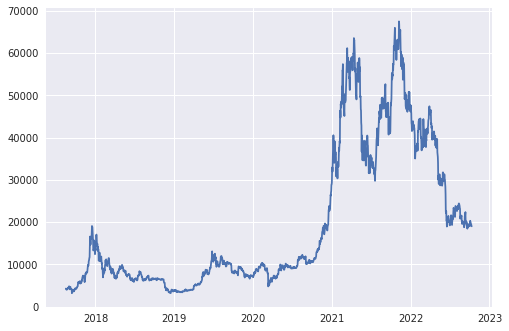

In [24]:
plt.style.use("seaborn")
plt.plot(df.index, df["close"])

In [25]:
close_array = df["close"].to_numpy()
close_array

array([19032.94, 19131.87, 19439.02, ...,  4139.98,  4108.37,  4285.08])

In [26]:
type(close_array)

numpy.ndarray

In [27]:
max_idx = argrelextrema(close_array, np.greater, order = 20)[0]

In [30]:
df.iloc[max_idx]

,symbol,open,high,low,close
date,,,,,
2022-10-04,BTC/USDT,19629.08,20475.00,19490.60,20337.82
2022-09-12,BTC/USDT,21826.87,22488.00,21538.51,22395.74
2022-08-13,BTC/USDT,24401.70,24888.00,24291.22,24441.38
2022-05-31,BTC/USDT,31734.23,32399.00,31200.01,31801.04
2022-03-29,BTC/USDT,47122.21,48096.47,46950.85,47434.80
2022-02-15,BTC/USDT,42535.94,44751.40,42427.03,44544.86
2021-11-08,BTC/USDT,63273.58,67789.00,63273.58,67525.83
2021-09-06,BTC/USDT,51756.88,52780.00,50969.33,52663.90
2021-06-14,BTC/USDT,39020.56,41064.05,38730.00,40516.29


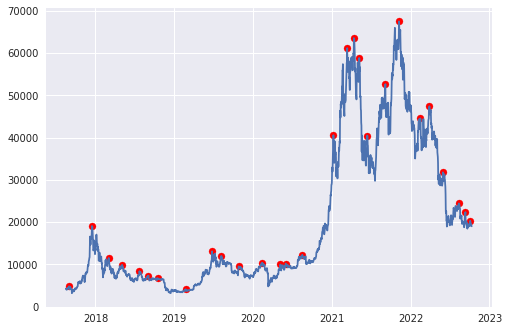

In [34]:
plt.style.use("seaborn")
plt.plot(df.index, df["close"])
plt.scatter(df.iloc[max_idx].index, df.iloc[max_idx]["close"], color = "r")